In [ ]:
import pandas as pd
import numpy as np
import math
import datetime

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

import plotly.io as pio
pio.renderers.default = "iframe"

import warnings
warnings.filterwarnings(action='ignore',category= FutureWarning)


READING THE DATASET

In [ ]:
coffee_sales = pd.read_csv("/content/index1.sales.csv")
coffee_sales

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano


EXPLORIG AND CLEANING THE DATA:

In [ ]:
coffee_sales.shape

(3636, 6)

In [ ]:
coffee_sales.index

RangeIndex(start=0, stop=3636, step=1)

In [ ]:
coffee_sales.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [ ]:
coffee_sales.dtypes

,0
date,datetime64[ns]
datetime,datetime64[ns]
cash_type,object
card,object
money,float64
coffee_name,object


In [ ]:
coffee_sales[['date','datetime']]=coffee_sales[['date','datetime']].apply(pd.to_datetime)

In [ ]:
coffee_sales.cash_type.unique()

array(['card', 'cash'], dtype=object)

In [ ]:
coffee_sales.coffee_name.nunique()

8

In [ ]:
coffee_sales[['cash_type','coffee_name']]=coffee_sales[['cash_type','coffee_name']].astype('category')

In [ ]:
coffee_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [ ]:
coffee_sales.card= coffee_sales.card.fillna('-')

In [ ]:
coffee_sales.rename(mapper={'cash_type':'payment_mode','card':'card_no.'},axis='columns',inplace=True)

In [ ]:
coffee_sales.insert(2,'time',coffee_sales['datetime'].apply(lambda x: datetime.time(x.hour,x.minute)))

In [ ]:
coffee_sales.sample(3)

,date,datetime,time,payment_mode,card_no.,money,coffee_name
2091,2024-10-25,2024-10-25 11:50:30.398,11:50:00,card,ANON-0000-0000-0012,35.76,Cocoa
705,2024-06-04,2024-06-04 21:36:06.924,21:36:00,card,ANON-0000-0000-0260,32.82,Americano with Milk
3378,2025-03-05,2025-03-05 11:41:22.429,11:41:00,card,ANON-0000-0000-1167,25.96,Americano


EXPLORATORY ANALYSIS

In [ ]:
sns.set_style("darkgrid")

Comparing Total Sales of Different Coffee Types

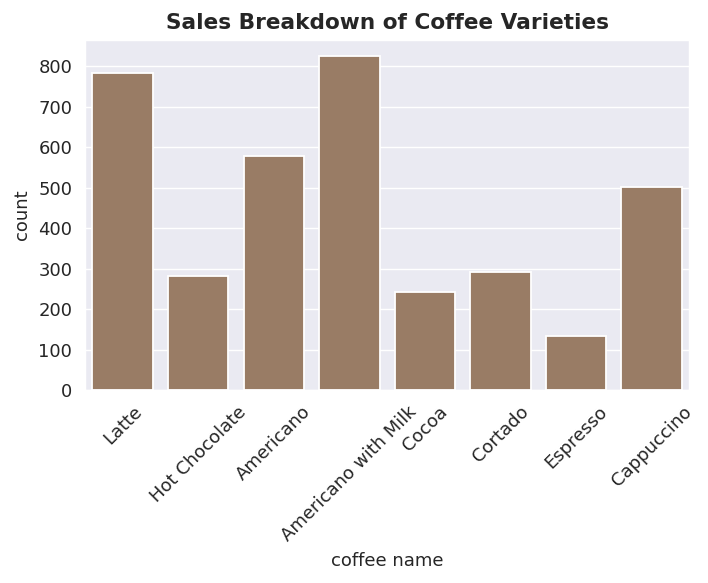

In [ ]:


plt.figure(figsize=(6,3.5),dpi=130)

sns.countplot(data=coffee_sales,x='coffee_name',color='#A27B5C')

plt.xticks(rotation=45)

plt.title("Sales Breakdown of Coffee Varieties",fontdict={'fontsize':12,'fontweight':'bold'})
plt.xlabel("coffee name")
plt.ylabel("count")

plt.show()

The countplot shows that a majority of the customers prefer having 'Americano with Milk' or 'Latte' while 'Cocoa' and 'Espresso' are the least sold ones.

Exploring the Price Ranges of Different Coffee Types

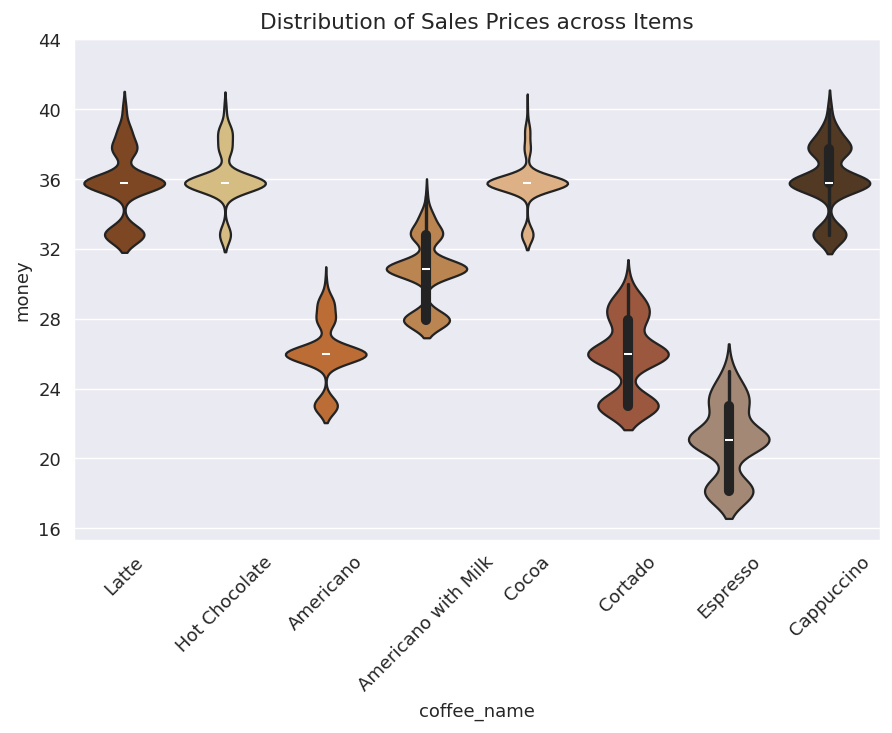

In [ ]:

plt.figure(figsize=(8,5),dpi=130)

sns.violinplot(x='coffee_name',y='money',data=coffee_sales,
               palette=["#8B4513", "#E2C275", "#D2691E", "#CD853F", "#ECB176","#AA512F","#AB886D","#58391C"])

plt.xticks(rotation=45)
plt.yticks(np.arange(16,48,4))

plt.title('Distribution of Sales Prices across Items')

plt.show()

The heights of the violin plot represent the price ranges of the items while the width of the plots at different levels represent density of sales (i.e., how many items were sold) at the corresponding price levels.

Cappuccino, cocoa, hot chocolate and Latte have almost similar price ranges, which are higher compared to other items.
Espresso has the lowest price range

Percentage Distribution of Payment Modes

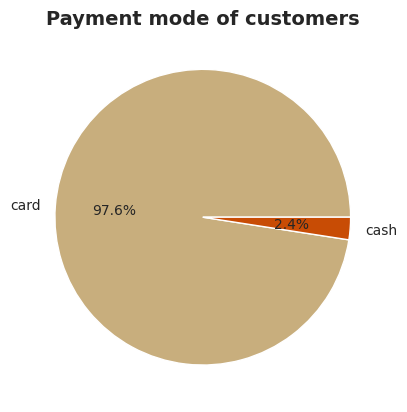

In [ ]:


payment=coffee_sales.payment_mode.value_counts()

colours=['#C8AE7D','#C84C05']

plt.pie(payment,labels=payment.index,autopct='%.1f%%',colors=colours);

plt.title("Payment mode of customers",fontdict={'fontsize':14,'fontweight':'bold'});


The piechart above shows that a large majority of the customers prefer card payment while only a few(2.9 %) of the customers has made cash payment.

Analysing Coffee Sales by Time of Day

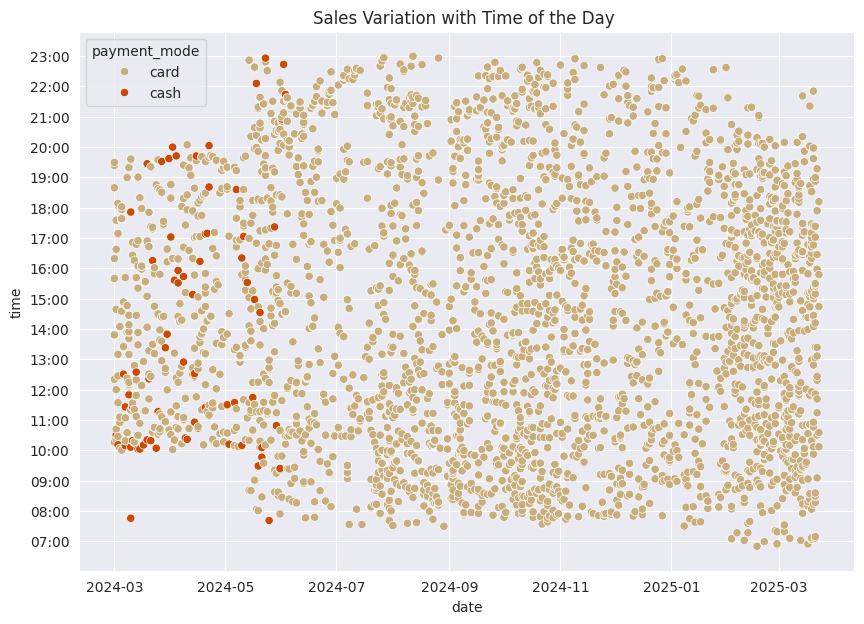

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import pandas as pd
import datetime

pio.renderers.default = "iframe"

import warnings
warnings.filterwarnings(action='ignore',category= FutureWarning)

# Ensure 'datetime' column is of datetime type
coffee_sales['datetime'] = pd.to_datetime(coffee_sales['datetime'])

def time_in_sec(t):
    #Convert the string to a datetime object first
    #t = pd.to_datetime(t)  # This line is no longer needed as 'datetime' is already of datetime type
    # The following line was incorrectly indented, causing the error.
    # Fixed: Indentation is corrected to match the function's block
    seconds = t.hour*3600 + t.minute*60 + t.second
    return seconds

# Assuming 'time' column was intended and it's actually named 'datetime'
coffee_sales['time in seconds'] = coffee_sales['datetime'].apply(time_in_sec)  #column 'time in seconds' is created, using 'datetime' column instead of 'time'

plt.figure(figsize=(10,7))

# Check if 'payment_mode' column exists, if not, it might be 'cash_type'
if 'payment_mode' not in coffee_sales.columns:
    if 'cash_type' in coffee_sales.columns:
        # Rename 'cash_type' to 'payment_mode' if it exists
        coffee_sales.rename(columns={'cash_type': 'payment_mode'}, inplace=True)
    else:
        # Raise an error if neither column is found
        raise KeyError("Neither 'payment_mode' nor 'cash_type' column found in the DataFrame.")

# Now it's safe to convert 'payment_mode' to string
coffee_sales['payment_mode'] = coffee_sales['payment_mode'].astype(str)

sns.scatterplot(data=coffee_sales, x='date', y='time in seconds', hue='payment_mode', palette={'card':'#C8AE7D','cash':'#C84C05'})
plt.ylabel("time")
plt.title("Sales Variation with Time of the Day ")

# Customization of time axis to display normal time in hour and minutes (since we have used time in seconds to make the plot)
# function to convert seconds to time string Fixed: Removed the indent for the comment
def sec_to_time(sec):
    sec=int(sec)
    if sec < 0:
        sec=0
    elif sec>= 86400:
        sec=86399

    t=datetime.time(sec//3600,(sec%3600)//60,sec%60)
    return t.strftime('%H:%M')

# customizing y-axis to show time with MultipleLocator()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(3600))   #Major ticks every hour

# formatting tick labels to show time in 'HH:MM' format
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,_: sec_to_time(x)))
plt.grid(True)
plt.show()

The scatterplot reveals that there were almost no orders before 10 am and after 8 pm until mid-May. However, after that point, orders started as early as 7:30 am and extended until 11 pm, likely due to an increase in the working hours of the shopping center where the vending machine is situated.

Although sales remain almost consistant throughout the each day, there are noticable peak hours from 8 to 11 am in the morning and from 7 pm onwards in the evening. However some of these time-based trends appear to be seasonal.

Few cash paying customers existed in the initial months, which then dropped to zero. This may be due to cahnge in payment preferance or policy changes.

Analyzing Daily Sales

In [ ]:
# Creating in interactive bar plot for daily sales count:
import pandas as pd
import plotly.express as px

# Assuming your data is in a CSV file named "index1.sales.csv"
coffee_sales = pd.read_csv("/content/index1.sales.csv") # Changed the file name to index1.sales.csv

daily_sales= coffee_sales.groupby('date').size().reset_index(name='no. of items sold')

fig= px.bar(daily_sales, x='date',y='no. of items sold', title="Daily Coffee Sales" )

fig.update_xaxes(rangeslider_visible=True, nticks=12)
fig.update_layout(height=700, width=1300,
                  title_x=0.5,
                 xaxis_rangeslider= dict(thickness=0.1))
fig.update_traces(marker_color='#765827')

fig.show()